In [9]:
import numpy as np
import pandas as pd
import yfinance as yf

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [10]:
data = yf.download('IBM', start='2015-01-01', end='2022-12-01')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,154.216064,156.128113,153.919693,154.933075,109.477043,5779673
2015-01-05,154.177826,154.177826,152.189301,152.495224,107.754433,5104898
2015-01-06,152.648178,152.925430,148.346085,149.206497,105.430595,6429448
2015-01-07,150.286804,150.286804,147.256210,148.231354,104.741531,4918083
2015-01-08,149.369019,152.045883,148.709366,151.453156,107.018074,4431693
...,...,...,...,...,...,...
2022-11-23,149.100006,150.460007,148.300003,148.750000,148.750000,3658200
2022-11-25,148.270004,149.490005,148.100006,148.369995,148.369995,2075200
2022-11-28,147.979996,148.240005,145.940002,146.179993,146.179993,3538100


In [11]:
def load_data(data,T):
    N = data.shape[0]
    raw = data.to_numpy().reshape(N,1,)
    Y_train = raw[1:N-T]
    X_train = raw[:N-T-1]
    Y_test = raw[N-T:]
    X_test = raw[N-T-1:N-1]
    return X_train,X_test,Y_train,Y_test

In [12]:
X_train,X_test,Y_train,Y_test = load_data(data['Open'],12)

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1,1)))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(1, activation = 'relu'))

model.compile(loss='mape', optimizer='adam', metrics = ['mse'])

In [14]:
model.fit(X_train,Y_train,epochs=10,batch_size=5,validation_data=(X_test,Y_test),verbose=1)

Epoch 1/10
396/396 [==============================] - 9s 10ms/step - loss: 37.2944 - mse: 5200.2842 - val_loss: 8.0980 - val_mse: 142.9275
Epoch 2/10
396/396 [==============================] - 3s 8ms/step - loss: 7.5312 - mse: 166.6005 - val_loss: 3.7024 - val_mse: 31.0071
Epoch 3/10
396/396 [==============================] - 3s 7ms/step - loss: 6.6746 - mse: 134.6499 - val_loss: 12.3569 - val_mse: 327.6711
Epoch 4/10
396/396 [==============================] - 3s 7ms/step - loss: 6.5148 - mse: 126.4664 - val_loss: 3.4921 - val_mse: 27.4322
Epoch 5/10
396/396 [==============================] - 3s 7ms/step - loss: 6.3865 - mse: 120.2561 - val_loss: 6.1015 - val_mse: 80.8464
Epoch 6/10
396/396 [==============================] - 3s 8ms/step - loss: 6.4646 - mse: 125.6695 - val_loss: 7.5094 - val_mse: 121.7913
Epoch 7/10
396/396 [==============================] - 3s 8ms/step - loss: 5.9153 - mse: 105.0477 - val_loss: 8.0069 - val_mse: 138.2842
Epoch 8/10
396/396 [===========================

In [15]:
Y_pred = model.predict(X_test)
res = pd.DataFrame({'X_test': X_test.reshape(X_test.shape[0]), 
                    'Y_test': Y_test.reshape(Y_test.shape[0]), 
                    'Y_pred': Y_pred.reshape(Y_pred.shape[0])})
res

1/1 [==============================] - 1s 1s/step


,X_test,Y_test,Y_pred
0,141.500000,142.630005,142.116623
1,142.630005,144.080002,142.886597
2,144.080002,144.130005,143.859695
3,144.130005,143.410004,143.892929
4,143.410004,146.559998,143.412125
5,146.559998,147.550003,145.485580
6,147.550003,147.600006,146.121262
7,147.600006,149.100006,146.153183
8,149.100006,148.270004,147.101532
9,148.270004,147.979996,146.578888


In [17]:
model.evaluate(X_test, Y_test, batch_size = 32) 

1/1 [==============================] - 0s 47ms/step - loss: 0.9229 - mse: 2.6556


[0.922938883304596, 2.6555731296539307]

<AxesSubplot: >

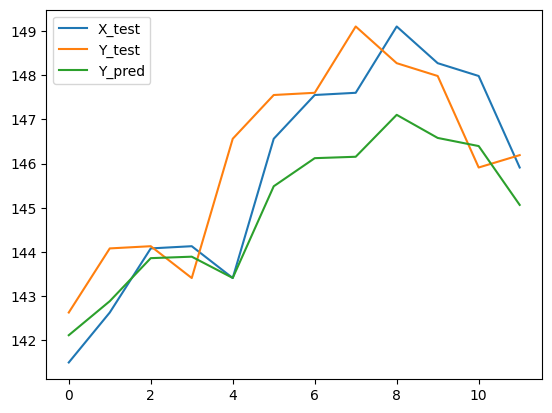

In [18]:
res.plot()